## 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import joblib
import pickle

## 2. Display Settings

In [2]:
pd.set_option("display.max_columns",None)

In [ ]:
plt.style.use('seaborn-v0_8-darkgrid')

In [5]:
import sklearn
sklearn.set_config(transform_output="pandas")

## 3. Getting the Data

In [10]:
train_df=pd.read_csv(r"data\train.csv")
val_df=pd.read_csv(r"data\val.csv")
test_df=pd.read_csv(r"data\test.csv")

In [11]:
train_df

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-06-21,Mumbai,Hyderabad,10:20:00,11:50:00,90,0.0,In-flight meal not included,4995
1,Air India,2019-05-18,Delhi,Cochin,09:00:00,07:40:00,1360,1.0,No Info,8372
2,Air India,2019-06-12,Kolkata,Banglore,09:10:00,11:05:00,1555,2.0,No Info,6117
3,Vistara,2019-04-01,Kolkata,Banglore,20:20:00,22:55:00,1595,1.0,No Info,7770
4,Vistara,2019-06-06,Kolkata,Banglore,17:00:00,10:45:00,1065,1.0,No Info,9187
...,...,...,...,...,...,...,...,...,...,...
635,Air Asia,2019-04-12,Banglore,Delhi,04:55:00,07:45:00,170,0.0,No Info,4282
636,Jet Airways,2019-05-09,Kolkata,Banglore,09:35:00,21:05:00,690,1.0,No Info,13067
637,Indigo,2019-05-15,Banglore,Delhi,06:05:00,08:50:00,165,0.0,No Info,4423
638,Multiple Carriers,2019-05-15,Delhi,Cochin,08:45:00,21:00:00,735,1.0,No Info,7670


In [12]:
val_df

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Air India,2019-06-01,Delhi,Cochin,05:15:00,19:15:00,2280,3.0,No Info,10703
1,Air India,2019-03-03,Delhi,Cochin,20:00:00,19:15:00,1395,2.0,No Info,17266
2,Air India,2019-03-06,Mumbai,Hyderabad,05:55:00,22:00:00,965,1.0,No Info,10366
3,Goair,2019-06-09,Kolkata,Banglore,16:40:00,00:15:00,455,1.0,No Info,9495
4,Jet Airways,2019-06-03,Delhi,Cochin,20:55:00,19:00:00,1325,1.0,No Info,14714
...,...,...,...,...,...,...,...,...,...,...
155,Spicejet,2019-04-03,Delhi,Cochin,08:45:00,13:15:00,270,1.0,No check-in baggage included,4098
156,Spicejet,2019-03-01,Mumbai,Hyderabad,05:45:00,07:05:00,80,0.0,No Info,12475
157,Multiple Carriers,2019-05-18,Delhi,Cochin,03:50:00,12:35:00,525,1.0,No Info,10197
158,Jet Airways,2019-03-01,Banglore,New Delhi,22:50:00,00:45:00,1555,1.0,No Info,26890


In [13]:
test_df

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Multiple Carriers,2019-03-03,Delhi,Cochin,18:15:00,01:35:00,440,1.0,No Info,18916
1,Jet Airways,2019-06-01,Delhi,Cochin,20:55:00,12:35:00,940,1.0,In-flight meal not included,10262
2,Multiple Carriers,2019-06-06,Delhi,Cochin,07:05:00,16:10:00,545,1.0,No Info,9646
3,Air India,2019-03-24,Kolkata,Banglore,16:50:00,18:30:00,1540,1.0,No Info,14641
4,Multiple Carriers,2019-05-27,Delhi,Cochin,10:20:00,19:00:00,520,1.0,No Info,9794
...,...,...,...,...,...,...,...,...,...,...
195,Spicejet,2019-04-21,Kolkata,Banglore,06:55:00,09:30:00,155,0.0,No Info,4174
196,Multiple Carriers,2019-06-01,Delhi,Cochin,11:40:00,19:15:00,455,1.0,No Info,10261
197,Indigo,2019-03-21,Mumbai,Hyderabad,21:20:00,22:45:00,85,0.0,No Info,2227
198,Jet Airways,2019-06-03,Delhi,Cochin,16:00:00,12:35:00,1235,1.0,In-flight meal not included,10262


In [14]:
# Split the data
def split_data(data):

    X=data.drop(columns=["price"])
    y=data['price'].copy()

    return (X,y)

X_train,y_train=split_data(train_df)

In [17]:
X_train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info
0,Jet Airways,2019-06-21,Mumbai,Hyderabad,10:20:00,11:50:00,90,0.0,In-flight meal not included
1,Air India,2019-05-18,Delhi,Cochin,09:00:00,07:40:00,1360,1.0,No Info
2,Air India,2019-06-12,Kolkata,Banglore,09:10:00,11:05:00,1555,2.0,No Info
3,Vistara,2019-04-01,Kolkata,Banglore,20:20:00,22:55:00,1595,1.0,No Info
4,Vistara,2019-06-06,Kolkata,Banglore,17:00:00,10:45:00,1065,1.0,No Info
...,...,...,...,...,...,...,...,...,...
635,Air Asia,2019-04-12,Banglore,Delhi,04:55:00,07:45:00,170,0.0,No Info
636,Jet Airways,2019-05-09,Kolkata,Banglore,09:35:00,21:05:00,690,1.0,No Info
637,Indigo,2019-05-15,Banglore,Delhi,06:05:00,08:50:00,165,0.0,No Info
638,Multiple Carriers,2019-05-15,Delhi,Cochin,08:45:00,21:00:00,735,1.0,No Info


In [18]:
X_test,y_test=split_data(test_df)
X_test

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info
0,Multiple Carriers,2019-03-03,Delhi,Cochin,18:15:00,01:35:00,440,1.0,No Info
1,Jet Airways,2019-06-01,Delhi,Cochin,20:55:00,12:35:00,940,1.0,In-flight meal not included
2,Multiple Carriers,2019-06-06,Delhi,Cochin,07:05:00,16:10:00,545,1.0,No Info
3,Air India,2019-03-24,Kolkata,Banglore,16:50:00,18:30:00,1540,1.0,No Info
4,Multiple Carriers,2019-05-27,Delhi,Cochin,10:20:00,19:00:00,520,1.0,No Info
...,...,...,...,...,...,...,...,...,...
195,Spicejet,2019-04-21,Kolkata,Banglore,06:55:00,09:30:00,155,0.0,No Info
196,Multiple Carriers,2019-06-01,Delhi,Cochin,11:40:00,19:15:00,455,1.0,No Info
197,Indigo,2019-03-21,Mumbai,Hyderabad,21:20:00,22:45:00,85,0.0,No Info
198,Jet Airways,2019-06-03,Delhi,Cochin,16:00:00,12:35:00,1235,1.0,In-flight meal not included


In [20]:
X_val,y_val=split_data(val_df)

In [21]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          640 non-null    object 
 1   date_of_journey  640 non-null    object 
 2   source           640 non-null    object 
 3   destination      640 non-null    object 
 4   dep_time         640 non-null    object 
 5   arrival_time     640 non-null    object 
 6   duration         640 non-null    int64  
 7   total_stops      640 non-null    float64
 8   additional_info  640 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 45.1+ KB


## 4. Data Preprocessing

In [35]:
numerical_cols=list(X_train.select_dtypes(include=['number']).columns)

In [37]:
categorical_cols=["airline","source","destination","additional_info"]
datetime_cols=["date_of_journey","dep_time","arrival_time"]

numerical_cols,categorical_cols,datetime_cols

(['duration', 'total_stops'],
 ['airline', 'source', 'destination', 'additional_info'],
 ['date_of_journey', 'dep_time', 'arrival_time'])

In [43]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from feature_engine.datetime import DatetimeFeatures

In [39]:
X_train.head(3)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info
0,Jet Airways,2019-06-21,Mumbai,Hyderabad,10:20:00,11:50:00,90,0.0,In-flight meal not included
1,Air India,2019-05-18,Delhi,Cochin,09:00:00,07:40:00,1360,1.0,No Info
2,Air India,2019-06-12,Kolkata,Banglore,09:10:00,11:05:00,1555,2.0,No Info


In [44]:
from pandas import Categorical


numerical_transformer=Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]
)

categorical_transformer=Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("ohe",OneHotEncoder(sparse_output=False,handle_unknown="ignore"))
    ]
)

doj_transformer=Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("extractor",DatetimeFeatures(features_to_extract=["month", "week", "day_of_week", "day_of_month"],format="mixed")),
        ("scaler",StandardScaler())
    ]
)

time_transformer=Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("extractor",DatetimeFeatures(features_to_extract=["hour","minute"],format="mixed"))
    ]
)

preprocessor=ColumnTransformer(
    transformers=[
        ("num_trans",numerical_transformer,numerical_cols),
        ("cat_trans",categorical_transformer,categorical_cols),
        ("doj_trans",doj_transformer,["date_of_journey"]),
        ("time_trans",time_transformer,datetime_cols[1:])
    ]
)

In [45]:
preprocessor.fit_transform(X_train)

,num_trans__duration,num_trans__total_stops,cat_trans__airline_Air Asia,cat_trans__airline_Air India,cat_trans__airline_Goair,cat_trans__airline_Indigo,cat_trans__airline_Jet Airways,cat_trans__airline_Multiple Carriers,cat_trans__airline_Spicejet,cat_trans__airline_Vistara,cat_trans__source_Banglore,cat_trans__source_Chennai,cat_trans__source_Delhi,cat_trans__source_Kolkata,cat_trans__source_Mumbai,cat_trans__destination_Banglore,cat_trans__destination_Cochin,cat_trans__destination_Delhi,cat_trans__destination_Hyderabad,cat_trans__destination_Kolkata,cat_trans__destination_New Delhi,cat_trans__additional_info_1 Long layover,cat_trans__additional_info_In-flight meal not included,cat_trans__additional_info_No Info,cat_trans__additional_info_No check-in baggage included,doj_trans__date_of_journey_month,doj_trans__date_of_journey_week,doj_trans__date_of_journey_day_of_week,doj_trans__date_of_journey_day_of_month,time_trans__dep_time_hour,time_trans__dep_time_minute,time_trans__arrival_time_hour,time_trans__arrival_time_minute
0,-1.095918,-1.212132,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.151587,1.331443,0.566118,0.963554,10,20,11,50
1,1.435699,0.317975,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.306386,0.375290,1.050498,0.604465,9,0,7,40
2,1.824412,1.848082,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.151587,1.140212,-0.402640,-0.113711,9,10,11,5
3,1.904148,0.317975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.538816,-0.772093,-1.371399,-1.430369,20,20,22,55
4,0.847647,0.317975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.151587,0.948982,0.081739,-0.831888,17,0,10,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,-0.936446,-1.212132,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.538816,-0.580863,0.566118,-0.113711,4,55,7,45
636,0.100122,0.317975,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.306386,0.184059,0.081739,-0.472800,9,35,21,5
637,-0.946413,-1.212132,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.306386,0.375290,-0.402640,0.245377,6,5,8,50
638,0.189825,0.317975,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.306386,0.375290,-0.402640,0.245377,8,45,21,0


## 5. Model Selection

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [47]:
algorithms={
    "linear-regression":LinearRegression(),
    "svm":SVR(kernel="rbf"),
    "rf":RandomForestRegressor(n_estimators=200,max_depth=6),
    "gbdt":GradientBoostingRegressor(),
    "xgb":XGBRegressor()
}

In [69]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error,mean_absolute_error,root_mean_squared_error, r2_score

In [51]:
data=pd.concat([train_df,val_df],ignore_index=True)
data

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-06-21,Mumbai,Hyderabad,10:20:00,11:50:00,90,0.0,In-flight meal not included,4995
1,Air India,2019-05-18,Delhi,Cochin,09:00:00,07:40:00,1360,1.0,No Info,8372
2,Air India,2019-06-12,Kolkata,Banglore,09:10:00,11:05:00,1555,2.0,No Info,6117
3,Vistara,2019-04-01,Kolkata,Banglore,20:20:00,22:55:00,1595,1.0,No Info,7770
4,Vistara,2019-06-06,Kolkata,Banglore,17:00:00,10:45:00,1065,1.0,No Info,9187
...,...,...,...,...,...,...,...,...,...,...
795,Spicejet,2019-04-03,Delhi,Cochin,08:45:00,13:15:00,270,1.0,No check-in baggage included,4098
796,Spicejet,2019-03-01,Mumbai,Hyderabad,05:45:00,07:05:00,80,0.0,No Info,12475
797,Multiple Carriers,2019-05-18,Delhi,Cochin,03:50:00,12:35:00,525,1.0,No Info,10197
798,Jet Airways,2019-03-01,Banglore,New Delhi,22:50:00,00:45:00,1555,1.0,No Info,26890


In [53]:
X_data,y_data=split_data(data=data)
y_data

0       4995
1       8372
2       6117
3       7770
4       9187
       ...  
795     4098
796    12475
797    10197
798    26890
799     4990
Name: price, Length: 800, dtype: int64

In [54]:
def plot_curves(sizes, mean_scores, std_scores, label, ax):
	ax.plot(
		sizes,
		mean_scores,
		marker="o",
		label=label
	)

	ax.fill_between(
		x=sizes,
		y1=mean_scores - std_scores,
		y2=mean_scores + std_scores,
		alpha=0.5
	)

In [61]:
# from sklearn.model_selection import KFold

# def plot_learning_curves(name,algorithm,figsize=(12,4)):

#     kfold=KFold(n_splits=4,shuffle=True,random_state=1)

#     model=Pipeline(
#         steps=[
#             ("preprocessor",preprocessor),
#             ("algo",algorithm)
#         ]
#     )

#     train_sizes,train_scores,test_scores=learning_curve(
#         estimator=model,
#         X=X_data,
#         y=y_data,
#         cv=kfold,
#         n_jobs=-1,
#         scoring="r2",
#         random_state=1
#     )

#     mean_train_scores=np.mean(train_scores,axis=1)
#     std_train_scores=np.std(train_scores,axis=1)

#     mean_test_scores=np.mean(test_scores,axis=1)
#     std_test_scores=np.mean(test_scores,axis=1)

#     fig,ax=plt.subplots(figsize=figsize)

#     # training curve
# 	plot_curves(
# 		train_sizes,
# 		mean_train_scores,
# 		std_train_scores,
# 		f"Train ({train_scores})",
# 		ax
# 	)

# 	# test curve
# 	plot_curves(
# 		train_sizes,
# 		mean_test_scores,
# 		std_test_scores,
# 		f"Test ({test_scores})",
# 		ax
# 	)

# 	ax.set(xlabel="Training Set Size", ylabel="R-square", title=name)

# 	ax.legend(loc="lower right")

# 	plt.show()

from sklearn.model_selection import KFold

def plot_learning_curves(name, algorithm, figsize=(12, 4)):

    kfold = KFold(n_splits=4, shuffle=True, random_state=1)

    model = Pipeline(
        steps=[
            ("preprocessor", preprocessor),
            ("algo", algorithm)
        ]
    )

    train_sizes, train_scores, test_scores = learning_curve(
        estimator=model,
        X=X_data,
        y=y_data,
        cv=kfold,
        n_jobs=-1,
        scoring="r2",
        random_state=1
    )

    mean_train_scores = np.mean(train_scores, axis=1)
    std_train_scores = np.std(train_scores, axis=1)
    train_score = f"{mean_train_scores[-1]:.2f} +/- {std_train_scores[-1]:.2f}"

    mean_test_scores = np.mean(test_scores, axis=1)
    std_test_scores = np.std(test_scores, axis=1)
    test_score = f"{mean_test_scores[-1]:.2f} +/- {std_test_scores[-1]:.2f}"

    fig, ax = plt.subplots(figsize=figsize)

    # training curve
    plot_curves(
        train_sizes,
        mean_train_scores,
        std_train_scores,
        f"Train ({train_score})",
        ax
    )

    # test curve
    plot_curves(
        train_sizes,
        mean_test_scores,
        std_test_scores,
        f"Test ({test_score})",
        ax
    )

    ax.set(xlabel="Training Set Size", ylabel="R-square", title=name)
    ax.legend(loc="lower right")
    plt.show()

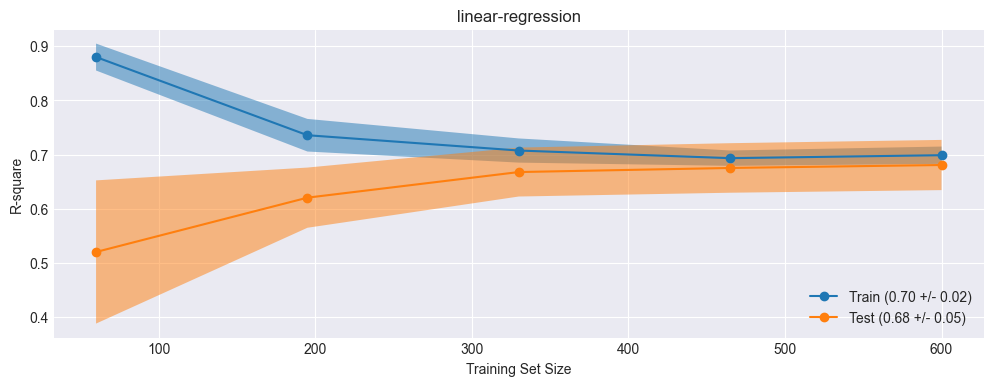

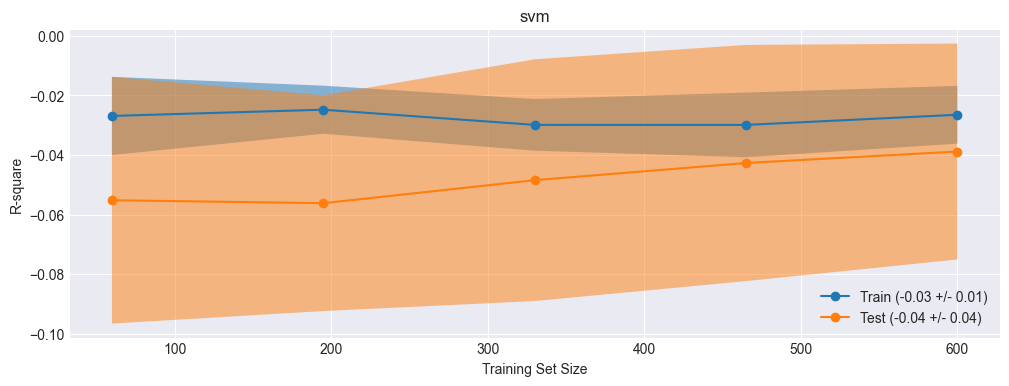

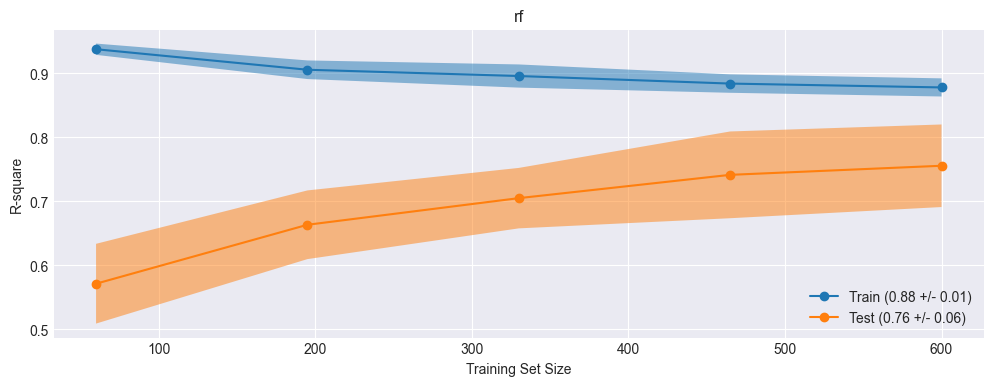

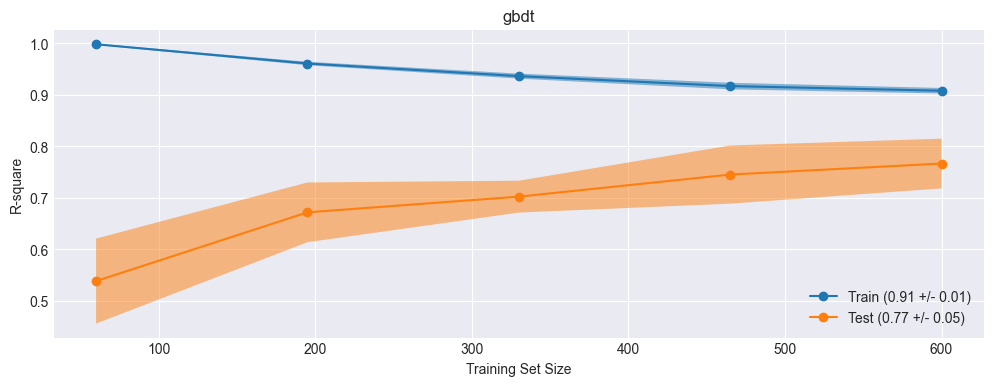

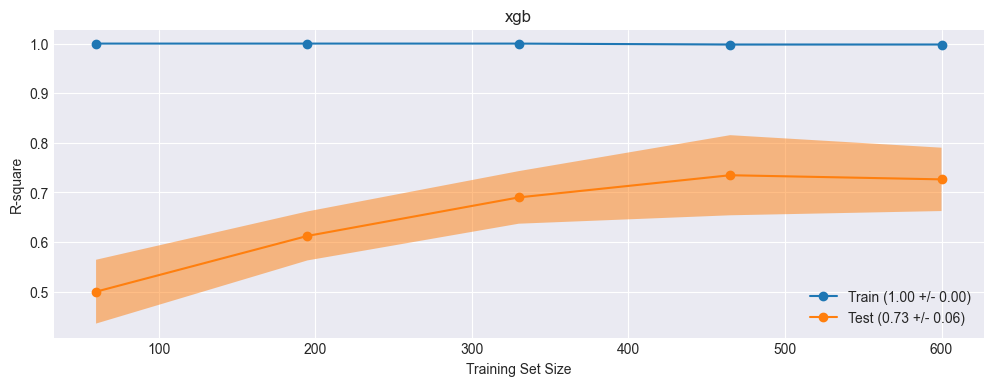

In [62]:
for name, alg in algorithms.items():
    plot_learning_curves(name=name,algorithm=alg)

## 6. Model Training

In [63]:
from turtle import mode


model=Pipeline(
    steps=[
        ("preprocessor",preprocessor),
        ("regressor",RandomForestRegressor(
            n_estimators=200,
            max_depth=6,
            n_jobs=-1
        ))
    ]
)

model.fit(X_data,y_data)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_trans',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['duration', 'total_stops']),
                                                 ('cat_trans',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['ai...
                                                                                                         'day_of_month'],
                                                                                    format='mixed')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['date_of_journey']),
                                                 ('time_trans',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('extractor',
                                                                   DatetimeFeatures(features_to_extract=['hour',
                                                                                                         'minute'],
                                                                                    format='mixed'))]),
                                                  ['dep_time',
                                                   'arrival_time'])])),
                ('regressor',
                 RandomForestRegressor(max_depth=6, n_estimators=200,
                                       n_jobs=-1))])

In [80]:
pd.set_option('display.float_format', '{:.4f}'.format)

In [87]:
def evaluate(X,y,model=model):

    y_pred=model.predict(X)
    r2=r2_score(y,y_pred)
    mse=mean_squared_error(y,y_pred)
    mae=mean_absolute_error(y,y_pred)
    rmse=root_mean_squared_error(y,y_pred)

    df_metrics=pd.DataFrame({"value":[r2,mse,mae,rmse]},index=["r2-score","mean-squared-error","mean-absolute-error","root-mean-squared-error"])

    return df_metrics

In [88]:
evaluate(X_data,y_data)

,value
r2-score,0.8687
mean-squared-error,2514392.8958
mean-absolute-error,1052.4311
root-mean-squared-error,1585.6837


In [89]:
evaluate(X_test,y_test)

,value
r2-score,0.7346
mean-squared-error,4336168.4998
mean-absolute-error,1374.1103
root-mean-squared-error,2082.3469


In [90]:
evaluate(X_val,y_val)

,value
r2-score,0.8962
mean-squared-error,2172114.3215
mean-absolute-error,1034.3056
root-mean-squared-error,1473.8095


## 7. Model Persistence

In [86]:
joblib.dump(model,"model.joblib")

['model.joblib']

In [91]:
saved_model=joblib.load("model.joblib")
saved_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_trans',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['duration', 'total_stops']),
                                                 ('cat_trans',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['ai...
                                                                                                         'day_of_month'],
                                                                                    format='mixed')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['date_of_journey']),
                                                 ('time_trans',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('extractor',
                                                                   DatetimeFeatures(features_to_extract=['hour',
                                                                                                         'minute'],
                                                                                    format='mixed'))]),
                                                  ['dep_time',
                                                   'arrival_time'])])),
                ('regressor',
                 RandomForestRegressor(max_depth=6, n_estimators=200,
                                       n_jobs=-1))])

In [92]:
evaluate(X_val,y_val,model=saved_model)

,value
r2-score,0.8962
mean-squared-error,2172114.3215
mean-absolute-error,1034.3056
root-mean-squared-error,1473.8095
